# Context

Build out the following 


![system](../assets/llmeme-concept.png)

In [4]:
# setup
import pandas as pd
import requests
import json
import google.generativeai as genai
import os
from dotenv import load_dotenv
load_dotenv()
genai.configure(api_key = os.getenv('GEMINI_API_KEY'))

In [3]:
url = 'https://api.imgflip.com/get_memes'
r = requests.get(url)
r.status_code

200

In [5]:

get_memes_df = pd.DataFrame(json.loads(r.content)['data']['memes'])
get_memes_df.head(20)

,id,name,url,width,height,box_count,captions
0,181913649,Drake Hotline Bling,https://i.imgflip.com/30b1gx.jpg,1200,1200,2,1364500
1,87743020,Two Buttons,https://i.imgflip.com/1g8my4.jpg,600,908,3,1057000
2,112126428,Distracted Boyfriend,https://i.imgflip.com/1ur9b0.jpg,1200,800,3,1079250
3,217743513,UNO Draw 25 Cards,https://i.imgflip.com/3lmzyx.jpg,500,494,2,588250
4,131087935,Running Away Balloon,https://i.imgflip.com/261o3j.jpg,761,1024,5,556750
5,124822590,Left Exit 12 Off Ramp,https://i.imgflip.com/22bdq6.jpg,804,767,3,668000
6,222403160,Bernie I Am Once Again Asking For Your Support,https://i.imgflip.com/3oevdk.jpg,750,750,2,304000
7,97984,Disaster Girl,https://i.imgflip.com/23ls.jpg,500,375,2,377000
8,135256802,Epic Handshake,https://i.imgflip.com/28j0te.jpg,900,645,3,231750
9,129242436,Change My Mind,https://i.imgflip.com/24y43o.jpg,482,361,2,637250


In [6]:
# setting up for annotation
get_memes_df_prep = get_memes_df.copy()
get_memes_df_prep['kym_definition'] = ""
get_memes_df_prep['kym_examples'] = ""
get_memes_df_prep['imgflip_api_post'] = ""

## annotating top 10

In [7]:
# from drake-posting
get_memes_df_prep.loc[get_memes_df_prep['name']=='Drake Hotline Bling','kym_definition'] = """
Drakeposting refers to the practice of posting reaction images and other still shots from the music video of the Canadian hip hop artist's 2015 hit single Hotline Bling on the imageboard site 4chan, typically to express one's disdain of the thread topic or something said by another poster in a similar vein to the usage of Costanza.jpg.
"""

# recent images
get_memes_df_prep.loc[get_memes_df_prep['name']=='Drake Hotline Bling','kym_examples'] = """[
    {
        'text0': 'Waiting for your icecream to thaw', # top, disapproved
        'text1': 'Warming up your spoon in the microwave to scoop it easier'  # bottom, approved
    },
    {
        'text0': 'Complaining about paywalled journalism', # top, disapproved
        'text1': 'Complaining about paywalled academic articles' # bottom, approved
    },    
]"""

get_memes_df_prep.loc[get_memes_df_prep['name']=='Drake Hotline Bling','imgflip_api_post'] = """
{
    'template_id':'181913649',
    'username': os.getenv('IMGFLIP_USERNAME'),
    'password': os.getenv('IMGFLIP_PASSWORD'),
    'text0': 'Waiting for your icecream to thaw',
    'text1': 'Warming up your spoon in the microwave to scoop it easier'
}
"""

In [ ]:
get_memes_df_prep.loc[get_memes_df_prep['name']=='Two Buttons','kym_definition'] = """
"Daily Struggle" is an exploitable comic featuring a character attempting to push one of two red buttons labeled with contradicting statements.
"""

# recent images
get_memes_df_prep.loc[get_memes_df_prep['name']=='Two Buttons','kym_examples'] = """[
    {
        'text0': 'Be a Dick', # one button
        'text1': 'Don't be a Dick' # other button
    },
    {
        'text0': 'Engineer products people want to buy', # one button
        'text1': 'Engineer people to buy your products' # other button
    },    
]"""

get_memes_df_prep.loc[get_memes_df_prep['name']=='Two Buttons','imgflip_api_post'] = """
{
    'template_id':'87743020',
    'username': IMGFLIP_USERNAME,
    'password': IMGFLIP_PASSWORD,
    'text0': 'Engineer products people want to buy',
    'text1': 'Engineer people to buy your products'
}
"""

In [13]:
get_memes_df_prep.loc[get_memes_df_prep['name']=='Distracted Boyfriend','kym_definition'] = """
Distracted Boyfriend, also known as Man Looking at Other Woman, is an object labeling stock photo series in which a man looks at the backside of a woman walking by while another woman, presumably his romantic partner, looks on disapprovingly
"""

# recent images
get_memes_df_prep.loc[get_memes_df_prep['name']=='Distracted Boyfriend','kym_examples'] = """[
    {
        'text0': 'Socialism', # the other woman
        'text1': 'The Youth', # the man
        'text2': 'Capitalism' # romantic partner
    },
    {
        'text0': 'solar eclipse', # the other woman
        'text1': 'me', # the man
        'text2': 'scientific evidence supporting the dangers of staring at the sun' # romantic partner
    },    
]"""

get_memes_df_prep.loc[get_memes_df_prep['name']=='Distracted Boyfriend','imgflip_api_post'] = """
{
    'template_id':'112126428',
    'username': IMGFLIP_USERNAME,
    'password': IMGFLIP_PASSWORD,
    'boxes[0][text]': 'Socialism',
    'boxes[1][text]': 'The Youth',
    'boxes[2][text]': 'Capitalism',
}
"""

In [16]:
get_memes_df_prep.loc[get_memes_df_prep['name']=='UNO Draw 25 Cards','kym_definition'] = """
Draw 25 refers to a two-paneled image macro with one image of a customizable Uno wild card next to an image of a man with a large hand of cards. The wild card typically gives the option of performing an action or "draw 25" and the second image infers that a person decided against performing the action. The image macro rose to popularity on Twitter, Reddit and Instagram in January 2020.
"""

# recent images
get_memes_df_prep.loc[get_memes_df_prep['name']=='UNO Draw 25 Cards','kym_examples'] = """[
    {
        'text0': 'Acknowledge that your child made a valid point against you', # option other than draw 25
        'text1': 'Parents', # the person who decided to draw 25
    },
    {
        'text0': 'Date me', # option other than draw 25
        'text1': 'My crush', # the person who decided to draw 25
    },    
]"""

get_memes_df_prep.loc[get_memes_df_prep['name']=='UNO Draw 25 Cards','imgflip_api_post'] = """
{
    'template_id':'217743513',
    'username': IMGFLIP_USERNAME,
    'password': IMGFLIP_PASSWORD,
    'text0': 'Date me',
    'text1': 'My crush'
}
"""

In [18]:
get_memes_df_prep.loc[get_memes_df_prep['name']=='Running Away Balloon','kym_definition'] = """
Running Away Balloon is a two-panel exploitable webcomic featuring a grey character attempting to reach a yellow balloon but is being held back by a pink character. The meme has been used to express frustrations with the subject's limitations.
"""

# recent images
get_memes_df_prep.loc[get_memes_df_prep['name']=='Running Away Balloon','kym_examples'] = """[
    {
        'text0': 'Me', # top panel, person
        'text1': 'Good Meme', # top panel, opportunity
        'text2': 'AI', # bottom panel, thing holding person back
        'text3': 'Me', # bottom panel, person
        'text4': 'Good Meme', # bottom panel, opportunity
    },
    {
        'text0': 'Me', # top panel, person
        'text1': 'Current Project', # top panel, opportunity
        'text2': 'Other Project Ideas', # bottom panel, thing holding person back
        'text3': 'Me', # bottom panel, person
        'text4': 'Current Project', # bottom panel, opportunity
    },    
]"""

get_memes_df_prep.loc[get_memes_df_prep['name']=='Running Away Balloon','imgflip_api_post'] = """
{
    'template_id':'131087935',
    'username': IMGFLIP_USERNAME,
    'password': IMGFLIP_PASSWORD,
    'boxes[0][text]': 'Me', # top frame, person
    'boxes[1][text]': 'Good Meme', # top frame, opportunity
    'boxes[2][text]': 'AI', # bottom frame, thing holding person back
    'boxes[3][text]': 'Me', # bottom frame, person
    'boxes[5][text]': 'Good Meme', # bottom frame, opportunity
}
"""

In [22]:
get_memes_df_prep.loc[get_memes_df_prep['name']=='Left Exit 12 Off Ramp','kym_definition'] = """
Left Exit 12 Off Ramp is a series of exploitables in which a car swerving into an off ramp. On the highway sign, the meme's author photoshops something the author disapproves of and something they would prefer. The car swerves toward the preference.
"""

# recent images
get_memes_df_prep.loc[get_memes_df_prep['name']=='Left Exit 12 Off Ramp','kym_examples'] = """[
    {
        'text0': 'A new year filled with opportunities to better myself and make a difference', # disapproved option
        'text1': 'Another year shitposting memes on Reddit', # approved option car is swerving toward
        'text2': 'Me', # car
    },
    {
        'text0': 'Using Tide Pods to clean laundry', # disapproved option
        'text1': 'Using Tide Pods as fine cuisine', # approved option car is swerving toward
        'text2': 'Me', # car
    },    
]"""

get_memes_df_prep.loc[get_memes_df_prep['name']=='Left Exit 12 Off Ramp','imgflip_api_post'] = """
{
    'template_id':'124822590',
    'username': IMGFLIP_USERNAME,
    'password': IMGFLIP_PASSWORD,
    'boxes[0][text]': 'A new year filled with opportunities to better myself and make a difference', # disapproved option
    'boxes[1][text]': 'Another year shitposting memes on Reddit', # approved option car is swerving toward
    'boxes[2][text]': 'Me', # car
}
"""

In [27]:
get_memes_df_prep.loc[get_memes_df_prep['name']=='Bernie I Am Once Again Asking For Your Support','kym_definition'] = """
I Am Once Again Asking for Your Financial Support is a quote uttered by the United States politician Bernie Sanders in his December 2019 fundraising video. Starting in mid-January 2020, the quote gained popularity as an image macro on Reddit and Facebook, with memes imagining various scenarios in which monetary donations are being requested.
"""

# recent images
get_memes_df_prep.loc[get_memes_df_prep['name']=='Bernie I Am Once Again Asking For Your Support','kym_examples'] = """[
    {
        'text0': 'when you tell people you just want cash for your birthday', # situation, top
        'text1': 'for your financial support', # what is being requested, bottom - below the words "I am once again asking "
    },
    {
        'text0': 'EA games evert 0.3 seconds', # situation, top
        'text1': 'for your financial support', # what is being requested, bottom - below the words "I am once again asking "
    },    
]"""

get_memes_df_prep.loc[get_memes_df_prep['name']=='Bernie I Am Once Again Asking For Your Support','imgflip_api_post'] = """
{
    'template_id':'222403160',
    'username': IMGFLIP_USERNAME,
    'password': IMGFLIP_PASSWORD,
    'text0': 'when you tell people you just want cash for your birthday', # situation, top
    'text1': 'for your financial support', # what is being requested, bottom - below the words "I am once again asking"
}
"""

In [30]:
get_memes_df_prep.loc[get_memes_df_prep['name']=='Disaster Girl','kym_definition'] = """
Disaster Girl is a photoshop meme in which an exploitable photo of a smiling girl is superimposed on to images of natural disasters and accidents to imply that she has caused some type of calamity depicted in the background.
"""

# recent images
get_memes_df_prep.loc[get_memes_df_prep['name']=='Disaster Girl','kym_examples'] = """[
    {
        'text0': 'flu season', # the disaster, or the top text
        'text1': 'RFK Jnr', # the disaster girl, or the bottom text
    },
    {
        'text0': 'you don't have to clean your room', # the disaster
        'text1': 'if there is no room', # the disaster girl
    },    
]"""

get_memes_df_prep.loc[get_memes_df_prep['name']=='Disaster Girl','imgflip_api_post'] = """
{
    'template_id':'97984',
    'username': IMGFLIP_USERNAME,
    'password': IMGFLIP_PASSWORD,
    'text0': 'flu season', # the disaster
    'text1': 'RFK Jnr', # the disaster girl
}
"""

In [35]:
get_memes_df_prep.loc[get_memes_df_prep['name']=='Epic Handshake','kym_definition'] = """
Epic Handshake, also known as the Predator Handshake, is a memorable scene from the 1987 science fiction action film Predator in which two men greet each other with an arm-wrestle handshake. Due to the campy nature of the scene, it has inspired many parody and remix videos on YouTube, often featuring background music using popular songs from the 1980s. In the 2010s and beyond, a watercolor painting depicting the handshake became a prevalent object-labeling meme format online with captions added to both arms and the hands in the middle, typically to show agreement between two parties on something.
"""

# recent images
get_memes_df_prep.loc[get_memes_df_prep['name']=='Epic Handshake','kym_examples'] = """[
    {
        'text0': 'not calling the police', # what they agree on
        'text1': 'rap', # right arm from left person
        'text2': 'punk', # left arm from right person
    },
    {
        'text0': 'constantly worrying about drivers', # what they agree on
        'text1': 'cyclists', # left arm
        'text2': 'linux users', # right arm
    },    
]"""

get_memes_df_prep.loc[get_memes_df_prep['name']=='Epic Handshake','imgflip_api_post'] = """
{
    'template_id':'135256802',
    'username': IMGFLIP_USERNAME,
    'password': IMGFLIP_PASSWORD,
    'boxes[0][text]': 'not calling the police', # what they agree on
    'boxes[1][text]': 'rap', # left arm
    'boxes[2][text]': 'punk', # right arm
}
"""

In [39]:
get_memes_df_prep.loc[get_memes_df_prep['name']=='Change My Mind','kym_definition'] = """
Steven Crowder's "Change My Mind" Campus Sign is a photograph of American-Canadian conservative podcaster Steven Crowder seated behind a sign that reads "Male Privilege is a myth / Change My Mind" outside of Texas Christian University. Since its upload via Crowder's Twitter account in February 2018, the photograph has been turned into an exploitable template for online parodies.
"""

# recent images
get_memes_df_prep.loc[get_memes_df_prep['name']=='Change My Mind','kym_examples'] = """[
    {
        'text0': 'pluto is not a planet', # the proposal, top of the sign
        'text1': '', # on the left of the change my mind text, optional
    },
    {
        'text0': 'that CEO was actively murdering people purely for profit', # the proposal, top of the sign
        'text1': '', # on the left of the change my mind text, optional
    },    
]"""

get_memes_df_prep.loc[get_memes_df_prep['name']=='Change My Mind','imgflip_api_post'] = """
{
    'template_id':'129242436',
    'username': IMGFLIP_USERNAME,
    'password': IMGFLIP_PASSWORD,
    'text0': 'pluto is not a planet', # the proposal, top of the sign
    'text1': '', # on the left of the change my mind text, optional
}
"""

In [36]:
get_memes_df_prep.loc[get_memes_df_prep['name']=='Change My Mind','id']

9    129242436
Name: id, dtype: object

In [38]:
# testing
url = "https://api.imgflip.com/caption_image"

payload = {
    'template_id':'129242436',
    'username': os.getenv('IMGFLIP_USERNAME'),
    'password': os.getenv('IMGFLIP_PASSWORD'),
    'text0': 'pluto is not a planet', # the proposal, top of the sign
    'text1': '', # on the left of the change my mind text, optional
}

# payload = {
#     'template_id':'135256802',
#     'username': os.getenv('IMGFLIP_USERNAME'),
#     'password': os.getenv('IMGFLIP_PASSWORD'),
#     'boxes[0][text]': 'not calling the police', # what they agree on
#     'boxes[1][text]': 'rap', # left arm
#     'boxes[2][text]': 'punk', # right arm
# }

r = requests.post(url, data=payload)
display(r.status_code,print(json.loads(r.content)))

{'success': True, 'data': {'url': 'https://i.imgflip.com/9i6rr9.jpg', 'page_url': 'https://imgflip.com/i/9i6rr9'}}


200

None

In [ ]:
# save this for downstream prototyping
get_memes_df_prep[~(get_memes_df_prep['kym_definition']=='')].to_pickle('../data/processed/memes20250128.pkl')

In [55]:
get_memes_df_prep[~(get_memes_df_prep['kym_definition']=='')].to_dict(orient='records')[1]

{'id': '87743020',
 'name': 'Two Buttons',
 'url': 'https://i.imgflip.com/1g8my4.jpg',
 'width': 600,
 'height': 908,
 'box_count': 3,
 'captions': 1057000,
 'kym_definition': '\n"Daily Struggle" is an exploitable comic featuring a character attempting to push one of two red buttons labeled with contradicting statements.\n',
 'kym_examples': "[\n    {\n        'text0': 'Be a Dick',\n        'text1': 'Don't be a Dick'\n    },\n    {\n        'text0': 'Engineer products people want to buy',\n        'text1': 'Engineer people to buy your products'\n    },    \n]",
 'imgflip_api_post': "\n{\n    'template_id':'181913649',\n    'username': IMGFLIP_USERNAME,\n    'password': IMGFLIP_PASSWORD,\n    'text0': 'Engineer products people want to buy',\n    'text1': 'Engineer people to buy your products'\n}\n"}

# Prompting with context
At least for the initial prototyping we'll limit to the top 10 memes - data annotation is the bottleneck presently, not retrieval

## initial trials and vibe testing
Note we may want to break this into two prompts - one that it is creative in selection, and the other which produces the API post

In [50]:
system_prompt = """
You are a sarcastic internet meme expert who wants to create memes for users based on the context provided. The danker the meme, the better.
Your input will be the user context followed by a series of meme options. Each meme will have a definition and a series of examples.
Your output is a json object, no ticks, no markdown, no formatting. The json object will be used to create a meme using the imgflip API.
Your job is to think about possible unexpected metaphors, chose a meme, and create text that will annotate the meme.

====
USER INPUT EXAMPLE:
I am developing an app to help me make the best memes. I think using AI is actually holding me back from making the best memes.

AVAILABLE CONTEXT:
[
{'id': '131087935',
 'name': 'Running Away Balloon',
 'url': 'https://i.imgflip.com/261o3j.jpg',
 'width': 761,
 'height': 1024,
 'box_count': 5,
 'captions': 556750,
 'kym_definition': "\nRunning Away Balloon is a two-panel exploitable webcomic featuring a grey character attempting to reach a yellow balloon but is being held back by a pink character. The meme has been used to express frustrations with the subject's limitations.\n",
 'kym_examples': "[\n    {\n        'text0': 'Me', # top panel, person\n        'text1': 'Good Meme', # top panel, opportunity\n        'text2': 'AI', # bottom panel, thing holding person back\n        'text3': 'Me', # bottom panel, person\n        'text4': 'Good Meme', # bottom panel, opportunity\n    },\n    {\n        'text0': 'Me', # top panel, person\n        'text1': 'Current Project', # top panel, opportunity\n        'text2': 'Other Project Ideas', # bottom panel, thing holding person back\n        'text3': 'Me', # bottom panel, person\n        'text4': 'Current Project', # bottom panel, opportunity\n    },    \n]",
 'imgflip_api_post': "\n{\n    'template_id':'131087935',\n    'username': IMGFLIP_USERNAME,\n    'password': IMGFLIP_PASSWORD,\n    'boxes[0][text]': 'Me', # top frame, person\n    'boxes[1][text]': 'Good Meme', # top frame, opportunity\n    'boxes[2][text]': 'AI', # bottom frame, thing holding person back\n    'boxes[3][text]': 'Me', # bottom frame, person\n    'boxes[5][text]': 'Good Meme', # bottom frame, opportunity\n}\n"}
},
{'id': '87743020',
 'name': 'Two Buttons',
 'url': 'https://i.imgflip.com/1g8my4.jpg',
 'width': 600,
 'height': 908,
 'box_count': 3,
 'captions': 1057000,
 'kym_definition': '\n"Daily Struggle" is an exploitable comic featuring a character attempting to push one of two red buttons labeled with contradicting statements.\n',
 'kym_examples': "[\n    {\n        'text0': 'Be a Dick',\n        'text1': 'Don't be a Dick'\n    },\n    {\n        'text0': 'Engineer products people want to buy',\n        'text1': 'Engineer people to buy your products'\n    },    \n]",
 'imgflip_api_post': "\n{\n    'template_id':'181913649',\n    'username': IMGFLIP_USERNAME,\n    'password': IMGFLIP_PASSWORD,\n    'text0': 'Engineer products people want to buy',\n    'text1': 'Engineer people to buy your products'\n}\n"}
...
]

OUTPUT EXAMPLE:
{
    'template_id':'131087935',
    'boxes[0][text]': 'Me',
    'boxes[1][text]': 'Good Meme',
    'boxes[2][text]': 'AI',
    'boxes[3][text]': 'Me',
    'boxes[5][text]': 'Good Meme',
}

"""

model = genai.GenerativeModel(
    model_name='gemini-1.5-flash',
    system_instruction=system_prompt,
    )

config = genai.GenerationConfig(
        max_output_tokens=1000,
        temperature=0.1,
    )



In [51]:
user_input = """
I should be a good parent and look after my kids. I will instead build this stupid meme app.
"""

In [58]:
context = str(get_memes_df_prep[~(get_memes_df_prep['kym_definition']=='')].to_dict(orient='records'))

In [60]:
prompt = f"""
USER INPUT:
{user_input}
====
AVAILABLE CONTEXT:
{context}
"""

In [61]:
response = model.generate_content(prompt)
print(response.text)

{
  "template_id": "124822590",
  "boxes[0][text]": "My kids",
  "boxes[1][text]": "Memes",
  "boxes[2][text]": "Me"
}



In [66]:
# todo - write json test
payload = json.loads(response.text)
# annotate creds
payload['username'] = os.getenv('IMGFLIP_USERNAME')
payload['password'] = os.getenv('IMGFLIP_PASSWORD')

In [67]:
# todo - write API request call
url = "https://api.imgflip.com/caption_image"

r = requests.post(url, data=payload)
display(r.status_code,print(json.loads(r.content)))

{'success': True, 'data': {'url': 'https://i.imgflip.com/9i6wix.jpg', 'page_url': 'https://imgflip.com/i/9i6wix'}}


200

None

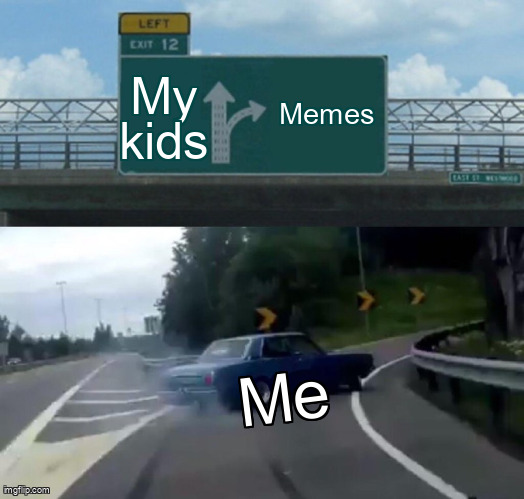

In [70]:
from IPython.display import Image
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}
def show_img_notebook(link):
    try:
        r = requests.get(link, headers=headers)
        assert r.status_code == 200
        return r.content 
    except Exception as e:
        print(f"Something went wrong: {e}")
Image(show_img_notebook('https://i.imgflip.com/9i6wix.jpg'))

# Memory
What if the user doesn't like the output?

In [71]:
fails = ""
fails += f"""
DECLINED MEMES (MAKE SOMETHING ELSE USING USER INPUT AND CONTEXT)
====
{response.text}

"""

In [72]:
# put the fails up top in case there is bias to follow the initial instructions
prompt = fails+prompt
response = model.generate_content(prompt)
print(response.text)

{
  "template_id": "181913649",
  "boxes[0][text]": "Spending quality time with my kids",
  "boxes[1][text]": "Building a meme app that will probably fail"
}



In [73]:
# todo - write json test
payload = json.loads(response.text)
# annotate creds
payload['username'] = os.getenv('IMGFLIP_USERNAME')
payload['password'] = os.getenv('IMGFLIP_PASSWORD')
r = requests.post(url, data=payload)
display(r.status_code,print(json.loads(r.content)))

{'success': True, 'data': {'url': 'https://i.imgflip.com/9ia6ud.jpg', 'page_url': 'https://imgflip.com/i/9ia6ud'}}


200

None

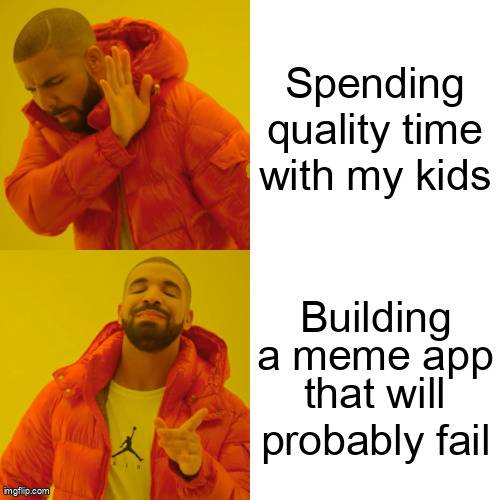

In [74]:
Image(show_img_notebook('https://i.imgflip.com/9ia6ud.jpg'))

# Collecting Logs and Interactions - User Feedback
We want to collect:
- Logs: of LLM calls, API requests
- Interactions: User Input, LLM Output, Sessionized

Thinking we can save this to a general purpose event table, e.g. event_id timestamp session_id type data metadata, and then aggregate/analyse later

We can write this to a cloud Postgres database to persist for downstream analysis (though I would be interested to learn how to do this on the sqllite db saved in the modal project)

In [8]:
import os
from dotenv import load_dotenv
import psycopg2
# Load environment variables
load_dotenv()

# Database connection parameters
db_params = {
    # "dbname": os.getenv("DB_NAME"),
    "dbname": 'postgres',
    "user": os.getenv("DB_USER"),
    "password": os.getenv("DB_PASSWORD"),
    "host": os.getenv("DB_HOST"),
    "port": os.getenv("DB_PORT")
}

try:
    # Establish connection
    conn = psycopg2.connect(**db_params)
    print("Successfully connected to the database!")
    
    # Create a cursor
    cur = conn.cursor()
    
    # Test the connection with a simple query
    cur.execute("SELECT version();")
    version = cur.fetchone()
    print(f"PostgreSQL version: {version[0]}")
    
except psycopg2.Error as e:
    print(f"Error connecting to the database: {e}")

finally:
    # Close cursor and connection
    if 'cur' in locals():
        cur.close()
    if 'conn' in locals():
        conn.close()
        print("Database connection closed.")

Successfully connected to the database!
PostgreSQL version: PostgreSQL 16.3 on aarch64-unknown-linux-gnu, compiled by gcc (GCC) 7.3.1 20180712 (Red Hat 7.3.1-17), 64-bit
Database connection closed.


## Creating the table

In [9]:
create_table_sql = """
CREATE TABLE IF NOT EXISTS events (
    event_id UUID PRIMARY KEY DEFAULT gen_random_uuid(),
    timestamp TIMESTAMP WITH TIME ZONE DEFAULT CURRENT_TIMESTAMP,
    session_id UUID,
    type VARCHAR(255),
    data JSONB,
    metadata JSONB
);
"""

In [10]:
try:
    # Establish connection
    conn = psycopg2.connect(**db_params)
    conn.autocommit = True
    print("Successfully connected to the database!")
    
    # Create a cursor and create the table
    cur = conn.cursor()
    cur.execute(create_table_sql)
    print("Successfully created events table!")
    
    # Verify the table was created
    cur.execute("""
        SELECT column_name, data_type 
        FROM information_schema.columns 
        WHERE table_name = 'events';
    """)
    
    print("\nTable structure:")
    for column in cur.fetchall():
        print(f"{column[0]}: {column[1]}")
    
except psycopg2.Error as e:
    print(f"Error: {e}")

finally:
    # Close cursor and connection
    if 'cur' in locals():
        cur.close()
    if 'conn' in locals():
        conn.close()
        print("\nDatabase connection closed.")

Successfully connected to the database!
Successfully created events table!

Table structure:
event_id: uuid
timestamp: timestamp with time zone
session_id: uuid
data: jsonb
metadata: jsonb
type: character varying

Database connection closed.


## Writing a test row

In [12]:
import uuid
import json
from datetime import datetime

# Test data
test_event = {
    "session_id": str(uuid.uuid4()),  # Generate random session ID - todo learn how to do this with gradio
    "type": "test_event",
    "data": json.dumps({
        "user_input": "Test message",
        "model_response": "Test response",
        "model": "test-model"
    }),
    "metadata": json.dumps({
        "client_timestamp": datetime.now().isoformat(),
        "environment": "development",
        "test": True
    })
}

In [13]:
try:
    # Establish connection
    conn = psycopg2.connect(**db_params)
    cur = conn.cursor()
    
    # Insert test row
    insert_sql = """
    INSERT INTO events (session_id, type, data, metadata)
    VALUES (%s, %s, %s::jsonb, %s::jsonb)
    RETURNING event_id, timestamp;
    """
    
    cur.execute(insert_sql, (
        test_event["session_id"],
        test_event["type"],
        test_event["data"],
        test_event["metadata"]
    ))
    
    # Get the inserted row's ID and timestamp
    event_id, timestamp = cur.fetchone()
    conn.commit()
    
    print(f"Successfully inserted test event!")
    print(f"Event ID: {event_id}")
    print(f"Timestamp: {timestamp}")
    
    # Verify by selecting the row
    cur.execute("SELECT * FROM events WHERE event_id = %s", (event_id,))
    row = cur.fetchone()
    print("\nInserted row:")
    print(f"event_id: {row[0]}")
    print(f"timestamp: {row[1]}")
    print(f"session_id: {row[2]}")
    print(f"type: {row[3]}")
    print(f"data: {row[4]}")
    print(f"metadata: {row[5]}")
    
except psycopg2.Error as e:
    print(f"Error: {e}")

finally:
    # Close cursor and connection
    if 'cur' in locals():
        cur.close()
    if 'conn' in locals():
        conn.close()
        print("\nDatabase connection closed.")

Successfully inserted test event!
Event ID: cc04b3a8-7a97-4ee9-aaac-39c3a50092e7
Timestamp: 2025-01-29 09:39:04.583571+00:00

Inserted row:
event_id: cc04b3a8-7a97-4ee9-aaac-39c3a50092e7
timestamp: 2025-01-29 09:39:04.583571+00:00
session_id: fd3e0eca-174d-4a0c-9106-7f5dcf4883a3
type: test_event
data: {'model': 'test-model', 'user_input': 'Test message', 'model_response': 'Test response'}
metadata: {'test': True, 'environment': 'development', 'client_timestamp': '2025-01-29T20:38:51.150165'}

Database connection closed.


# Modularising and error handling

## prompt construction

In [14]:
from typing import Dict, Any, Optional
def construct_meme_prompt(
    user_input: str,
    meme_context: list,
    previous_attempts: list = None
) -> str:
    """
    Constructs a prompt for the meme generation model.
    
    Args:
        user_input (str): The user's input text/request
        meme_context (list): List of available meme templates with their definitions
        previous_attempts (list, optional): List of previously declined meme attempts
        
    Returns:
        str: Formatted prompt string
        
    Raises:
        ValueError: If user_input is empty or meme_context is empty
        TypeError: If inputs are not of expected types
    """
    # Input validation
    if not isinstance(user_input, str):
        raise TypeError("user_input must be a string")
    if not isinstance(meme_context, list):
        raise TypeError("meme_context must be a list")
    if previous_attempts is not None and not isinstance(previous_attempts, list):
        raise TypeError("previous_attempts must be a list")
    
    # Content validation
    if not user_input.strip():
        raise ValueError("user_input cannot be empty")
    if not meme_context:
        raise ValueError("meme_context cannot be empty")
    
    # Construct the prompt
    prompt_parts = []
    
    # Add previous attempts if they exist
    if previous_attempts and len(previous_attempts) > 0:
        declined_memes = "DECLINED MEMES (MAKE SOMETHING ELSE USING USER INPUT AND CONTEXT)\n===="
        for attempt in previous_attempts:
            declined_memes += f"\n{attempt}\n"
        prompt_parts.append(declined_memes)
    
    # Add user input
    prompt_parts.append(f"USER INPUT:\n{user_input.strip()}")
    
    # Add context separator
    prompt_parts.append("====")
    
    # Add available context
    prompt_parts.append(f"AVAILABLE CONTEXT:\n{str(meme_context)}")
    
    # Join all parts with newlines
    return "\n".join(prompt_parts)

In [17]:
import pandas as pd
context = pd.read_pickle('../data/processed/memes20250128.pkl').to_dict(orient='records')
user_input = """
The frustrating feeling when you're building over-complicated stuff rather than shipping stuff for your users
"""
print(construct_meme_prompt(user_input, context))

USER INPUT:
The frustrating feeling when you're building overc-omplicated stuff rather than shipping stuff for your users
====
AVAILABLE CONTEXT:
[{'id': '181913649', 'name': 'Drake Hotline Bling', 'url': 'https://i.imgflip.com/30b1gx.jpg', 'width': 1200, 'height': 1200, 'box_count': 2, 'captions': 1364500, 'kym_definition': "\nDrakeposting refers to the practice of posting reaction images and other still shots from the music video of the Canadian hip hop artist's 2015 hit single Hotline Bling on the imageboard site 4chan, typically to express one's disdain of the thread topic or something said by another poster in a similar vein to the usage of Costanza.jpg.\n", 'kym_examples': "[\n    {\n        'text0': 'Waiting for your icecream to thaw',\n        'text1': 'Warming up your spoon in the microwave to scoop it easier'\n    },\n    {\n        'text0': 'Complaining about paywalled journalism',\n        'text1': 'Complaining about paywalled academic articles'\n    },    \n]", 'imgflip_ap

## database logging
todo - have "proper" logging

In [16]:
from datetime import datetime
from typing import Optional, Any, Dict
import psycopg2
from psycopg2.extras import Json

def log_event(
    session_id: str,
    event_type: str,
    data: Dict[str, Any],
    metadata: Optional[Dict[str, Any]] = None,
    db_params: Optional[Dict[str, str]] = None
) -> Optional[str]:
    """
    Logs an event to the PostgreSQL database.
    
    Args:
        session_id (str): UUID of the current session
        event_type (str): Type of event (e.g., 'llm_request', 'api_error', 'meme_generated')
        data (dict): Main event data (e.g., user input, model response)
        metadata (dict, optional): Additional context about the event
        db_params (dict, optional): Database connection parameters. If None, uses environment variables
        
    Returns:
        str: Event ID if successful, None if failed
        
    Raises:
        ValueError: If required parameters are invalid
        psycopg2.Error: If database operation fails
    """
    # Input validation
    if not isinstance(session_id, str):
        raise ValueError("session_id must be a string")
    if not isinstance(event_type, str):
        raise ValueError("event_type must be a string")
    if not isinstance(data, dict):
        raise ValueError("data must be a dictionary")
    if metadata is not None and not isinstance(metadata, dict):
        raise ValueError("metadata must be a dictionary")
    
    # Use default db_params if none provided
    if db_params is None:
        db_params = {
            "dbname": "postgres",
            "user": os.getenv("DB_USER"),
            "password": os.getenv("DB_PASSWORD"),
            "host": os.getenv("DB_HOST"),
            "port": os.getenv("DB_PORT")
        }
    
    # Ensure all required db_params are present
    required_params = ["dbname", "user", "password", "host", "port"]
    if not all(param in db_params for param in required_params):
        raise ValueError(f"Missing required database parameters. Need: {required_params}")
    
    # Add default metadata
    full_metadata = {
        "timestamp_utc": datetime.utcnow().isoformat(),
        "environment": os.getenv("ENVIRONMENT", "development"),
    }
    if metadata:
        full_metadata.update(metadata)
    
    try:
        # Establish connection
        conn = psycopg2.connect(**db_params)
        cur = conn.cursor()
        
        # Insert event
        insert_sql = """
        INSERT INTO events (session_id, type, data, metadata)
        VALUES (%s, %s, %s::jsonb, %s::jsonb)
        RETURNING event_id;
        """
        
        cur.execute(insert_sql, (
            session_id,
            event_type,
            Json(data),
            Json(full_metadata)
        ))
        
        event_id = cur.fetchone()[0]
        conn.commit()
        
        return str(event_id)
        
    except psycopg2.Error as e:
        # Log database errors (might want to use proper logging here)
        print(f"Database error: {e}")
        raise
        
    finally:
        # Ensure connections are closed
        if 'cur' in locals():
            cur.close()
        if 'conn' in locals():
            conn.close()

Logging events
```python
# Start a new session
session_id = str(uuid.uuid4())

try:
    # Log user input
    log_event(
        session_id=session_id,
        event_type="user_input",
        data={"input_text": user_input}
    )
    
    # Generate meme
    response = model.generate_content(prompt)
    
    # Log LLM response
    log_event(
        session_id=session_id,
        event_type="llm_response",
        data={
            "prompt": prompt,
            "response": response.text
        }
    )
    
    # Make API call
    r = requests.post(url, data=payload)
    
    # Log API response
    log_event(
        session_id=session_id,
        event_type="api_response",
        data={
            "status_code": r.status_code,
            "response": r.json()
        }
    )
    
except Exception as e:
    # Log any errors
    log_event(
        session_id=session_id,
        event_type="error",
        data={
            "error_type": type(e).__name__,
            "error_message": str(e)
        }
    )
    raise
```

## meme completion

In [20]:
import google.generativeai as genai
import os
from dotenv import load_dotenv
load_dotenv()
genai.configure(api_key = os.getenv('GEMINI_API_KEY'))

/home/gp/dev/llmeme/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [22]:
def generate_meme_completion(
    prompt: str,
    model: Any,
    max_attempts: int = 5,
    config: Optional[Dict[str, Any]] = None
) -> Dict[str, Any]:
    """
    Generates a meme completion and validates JSON output, with multiple attempts on JSON decode failure.
    
    Args:
        prompt (str): The constructed prompt for meme generation
        model: The generative model instance
        max_attempts (int): Maximum number of attempts to get valid JSON
        config (dict, optional): Model configuration parameters
        
    Returns:
        dict: Validated JSON response from the model
        
    Raises:
        RuntimeError: If model generation fails or produces invalid JSON after all attempts
    """
    if config is None:
        config = {
            'max_output_tokens': 1000,
            'temperature': 0.1,
        }
    
    last_error = None
    for attempt in range(max_attempts):
        try:
            # Generate completion
            response = model.generate_content(
                prompt,
                generation_config=genai.GenerationConfig(**config)
            )
            
            if not response.text:
                last_error = RuntimeError("Model returned empty response")
                continue
                
            # Parse JSON response
            meme_data = json.loads(response.text)
            return meme_data
            
        except json.JSONDecodeError as e:
            last_error = RuntimeError(f"Invalid JSON in model response (attempt {attempt + 1}/{max_attempts}): {e}")
            continue  # Try again
            
    # If we get here, all attempts failed
    raise RuntimeError(f"Failed to get valid response after {max_attempts} attempts. Last error: {last_error}")

In [21]:
system_prompt = """
You are a sarcastic internet meme expert who wants to create memes for users based on the context provided. The danker the meme, the better.
Your input will be the user context followed by a series of meme options. Each meme will have a definition and a series of examples.
Your output is a json object, no ticks, no markdown, no formatting. The json object will be used to create a meme using the imgflip API.
Your job is to think about possible unexpected metaphors, chose a meme, and create text that will annotate the meme.
If your previous suggestion was unsuccessful, you will see this added to the top of the prompt under heading `DECLINED MEMES (MAKE SOMETHING ELSE USING USER INPUT AND CONTEXT)`.

====
USER INPUT EXAMPLE:
I am developing an app to help me make the best memes. I think using AI is actually holding me back from making the best memes.

AVAILABLE CONTEXT:
[
{'id': '131087935',
 'name': 'Running Away Balloon',
 'url': 'https://i.imgflip.com/261o3j.jpg',
 'width': 761,
 'height': 1024,
 'box_count': 5,
 'captions': 556750,
 'kym_definition': "\nRunning Away Balloon is a two-panel exploitable webcomic featuring a grey character attempting to reach a yellow balloon but is being held back by a pink character. The meme has been used to express frustrations with the subject's limitations.\n",
 'kym_examples': "[\n    {\n        'text0': 'Me', # top panel, person\n        'text1': 'Good Meme', # top panel, opportunity\n        'text2': 'AI', # bottom panel, thing holding person back\n        'text3': 'Me', # bottom panel, person\n        'text4': 'Good Meme', # bottom panel, opportunity\n    },\n    {\n        'text0': 'Me', # top panel, person\n        'text1': 'Current Project', # top panel, opportunity\n        'text2': 'Other Project Ideas', # bottom panel, thing holding person back\n        'text3': 'Me', # bottom panel, person\n        'text4': 'Current Project', # bottom panel, opportunity\n    },    \n]",
 'imgflip_api_post': "\n{\n    'template_id':'131087935',\n    'username': IMGFLIP_USERNAME,\n    'password': IMGFLIP_PASSWORD,\n    'boxes[0][text]': 'Me', # top frame, person\n    'boxes[1][text]': 'Good Meme', # top frame, opportunity\n    'boxes[2][text]': 'AI', # bottom frame, thing holding person back\n    'boxes[3][text]': 'Me', # bottom frame, person\n    'boxes[5][text]': 'Good Meme', # bottom frame, opportunity\n}\n"}
},
{'id': '87743020',
 'name': 'Two Buttons',
 'url': 'https://i.imgflip.com/1g8my4.jpg',
 'width': 600,
 'height': 908,
 'box_count': 3,
 'captions': 1057000,
 'kym_definition': '\n"Daily Struggle" is an exploitable comic featuring a character attempting to push one of two red buttons labeled with contradicting statements.\n',
 'kym_examples': "[\n    {\n        'text0': 'Be a Dick',\n        'text1': 'Don't be a Dick'\n    },\n    {\n        'text0': 'Engineer products people want to buy',\n        'text1': 'Engineer people to buy your products'\n    },    \n]",
 'imgflip_api_post': "\n{\n    'template_id':'181913649',\n    'username': IMGFLIP_USERNAME,\n    'password': IMGFLIP_PASSWORD,\n    'text0': 'Engineer products people want to buy',\n    'text1': 'Engineer people to buy your products'\n}\n"}
...
]

OUTPUT EXAMPLE:
{
    'template_id':'131087935',
    'boxes[0][text]': 'Me',
    'boxes[1][text]': 'Good Meme',
    'boxes[2][text]': 'AI',
    'boxes[3][text]': 'Me',
    'boxes[5][text]': 'Good Meme',
}

"""

model = genai.GenerativeModel(
    model_name='gemini-1.5-flash',
    system_instruction=system_prompt,
    )

In [25]:
# let's test this out
session_id = str(uuid.uuid4())

try:
    # Generate prompt
    prompt = construct_meme_prompt(user_input, context)
    
    # Generate meme data
    meme_data = generate_meme_completion(
        prompt=prompt,
        model=model
    )
    
    # Log successful completion
    log_event(
        session_id=session_id,
        event_type="llm_response",
        data={
            "prompt": prompt,
            "response": meme_data
        },
        metadata =  {
        "client_timestamp": datetime.now().isoformat(),
        "environment": "development",
        "test": True
        }
    )
    
    # Add credentials for API call
    meme_data.update({
        'username': os.getenv('IMGFLIP_USERNAME'),
        'password': os.getenv('IMGFLIP_PASSWORD')
    })
    
except RuntimeError as e:
    # Log the error
    log_event(
        session_id=session_id,
        event_type="llm_error",
        data={
            "error_type": type(e).__name__,
            "error_message": str(e),
            "prompt": prompt
        }
    )
    raise  # Re-raise the error for upstream handling

## meme creation

In [32]:
import requests
def create_imgflip_meme(
    meme_data: Dict[str, Any],
    api_url: str = "https://api.imgflip.com/caption_image"
) -> Dict[str, Any]:
    """
    Creates a meme using the imgflip API and returns response data including the URL.
    
    Args:
        meme_data (dict): Meme generation data including template_id and text fields
        api_url (str): Imgflip API endpoint
        
    Returns:
        dict: Response containing status and image data
        {
            'success': bool,
            'image_url': str,  # URL of generated meme if successful
            'error_message': str,  # Present only if success is False
            'raw_response': dict  # Full API response
        }
        
    Raises:
        RuntimeError: If API request fails
    """
    try:
        # Make API request
        response = requests.post(api_url, data=meme_data)
        response_data = response.json()
        
        # Check if request was successful
        if response.status_code == 200 and response_data.get('success'):
            return {
                'success': True,
                'image_url': response_data['data']['url'],
                'raw_response': response_data
            }
        else:
            error_msg = response_data.get('error_message', 'Unknown error')
            return {
                'success': False,
                'error_message': error_msg,
                'raw_response': response_data
            }
            
    except requests.RequestException as e:
        raise RuntimeError(f"API request failed: {str(e)}")
    except json.JSONDecodeError as e:
        raise RuntimeError(f"Invalid API response format: {str(e)}")

In [33]:
try:
    # Create meme
    imgflip_response = create_imgflip_meme(meme_data)
    
    if imgflip_response['success']:
        # Log successful meme creation
        log_event(
            session_id=session_id,
            event_type="meme_created",
            data={
                "image_url": imgflip_response['image_url'],
                "template_id": meme_data['template_id']
            },
            metadata =  {
            "client_timestamp": datetime.now().isoformat(),
            "environment": "development",
            "test": True
            }            
        )
    else:
        # Log API error
        log_event(
            session_id=session_id,
            event_type="api_error",
            data={
                "error_message": imgflip_response['error_message'],
                "raw_response": imgflip_response['raw_response']
            },
            metadata =  {
            "client_timestamp": datetime.now().isoformat(),
            "environment": "development",
            "test": True
            }                 
        )
        raise RuntimeError(f"Meme creation failed: {imgflip_response['error_message']}")

except Exception as e:
    log_event(
        session_id=session_id,
        event_type="error",
        data={
            "error_type": type(e).__name__,
            "error_message": str(e)
        },
            metadata =  {
            "client_timestamp": datetime.now().isoformat(),
            "environment": "development",
            "test": True
            }             
    )
    raise    

In [34]:
imgflip_response

{'success': True,
 'image_url': 'https://i.imgflip.com/9ibwdx.jpg',
 'raw_response': {'success': True,
  'data': {'url': 'https://i.imgflip.com/9ibwdx.jpg',
   'page_url': 'https://imgflip.com/i/9ibwdx'}}}

# bringing it all together

In [47]:
# setup
import google.generativeai as genai
import os
from dotenv import load_dotenv
load_dotenv()
import json
genai.configure(api_key = os.getenv('GEMINI_API_KEY'))

# set system prompt
system_prompt = open('../apps/gradio/system_prompt.txt').read()

# get context
with open('../apps/gradio/memes20250128.json', 'r') as f:
    context = json.load(f)

# get model
model = genai.GenerativeModel(
    model_name='gemini-1.5-flash',
    system_instruction=system_prompt,
    )

# generate user session id
session_id = str(uuid.uuid4()) # this will be done differently in the app

# user flow for meme rejection
if 'previous_attempts' not in globals():
    previous_attempts = []

if 'meme_data' in globals():
    previous_attempts.append(meme_data)

# generate API data packet
try:
    # Generate prompt
    prompt = construct_meme_prompt(user_input, context,previous_attempts)
    
    # Generate meme data
    meme_data = generate_meme_completion(
        prompt=prompt,
        model=model
    )
    
    # Log successful completion
    log_event(
        session_id=session_id,
        event_type="llm_response",
        data={
            "prompt": prompt,
            "response": meme_data
        },
        metadata =  {
        "client_timestamp": datetime.now().isoformat(),
        "environment": "development",
        "test": True
        }
    )
    
    # Add credentials for API call
    meme_data.update({
        'username': os.getenv('IMGFLIP_USERNAME'),
        'password': os.getenv('IMGFLIP_PASSWORD')
    })
    
except RuntimeError as e:
    # Log the error
    log_event(
        session_id=session_id,
        event_type="llm_error",
        data={
            "error_type": type(e).__name__,
            "error_message": str(e),
            "prompt": prompt
        }
    )
    raise  # Re-raise the error for upstream handling

# try using data packet to create meme
try:
    # Create meme
    imgflip_response = create_imgflip_meme(meme_data)
    
    if imgflip_response['success']:
        # Log successful meme creation
        log_event(
            session_id=session_id,
            event_type="meme_created",
            data={
                "image_url": imgflip_response['image_url'],
                "template_id": meme_data['template_id']
            },
            metadata =  {
            "client_timestamp": datetime.now().isoformat(),
            "environment": "development",
            "test": True
            }            
        )
    else:
        # Log API error
        log_event(
            session_id=session_id,
            event_type="api_error",
            data={
                "error_message": imgflip_response['error_message'],
                "raw_response": imgflip_response['raw_response']
            },
            metadata =  {
            "client_timestamp": datetime.now().isoformat(),
            "environment": "development",
            "test": True
            }                 
        )
        raise RuntimeError(f"Meme creation failed: {imgflip_response['error_message']}")

except Exception as e:
    log_event(
        session_id=session_id,
        event_type="error",
        data={
            "error_type": type(e).__name__,
            "error_message": str(e)
        },
            metadata =  {
            "client_timestamp": datetime.now().isoformat(),
            "environment": "development",
            "test": True
            }             
    )
    raise  


In [49]:
imgflip_response

{'success': True,
 'image_url': 'https://i.imgflip.com/9iellt.jpg',
 'raw_response': {'success': True,
  'data': {'url': 'https://i.imgflip.com/9iellt.jpg',
   'page_url': 'https://imgflip.com/i/9iellt'}}}

In [44]:
# moving context to app folder
pd.read_pickle('../data/processed/memes20250128.pkl').to_json('../apps/gradio/memes20250128.json',orient='records')

## testing utils
restart kernal and run

In [50]:
# First, we'll set up imports and environment
import sys
sys.path.append('../apps/gradio')  # Add the utils.py location to Python path
from utils import *
import os
from dotenv import load_dotenv
import google.generativeai as genai
import json
from uuid import uuid4

# Load environment variables
load_dotenv()

# Configure Gemini
genai.configure(api_key=os.getenv('GEMINI_API_KEY'))

# Test 1: Load and verify context files
print("Testing context loading...")
try:
    with open('../apps/gradio/system_prompt.txt', 'r') as f:
        system_prompt = f.read()
    print("✓ System prompt loaded")
    
    with open('../apps/gradio/memes20250128.json', 'r') as f:
        context = json.load(f)
    print("✓ Meme context loaded")
except Exception as e:
    print(f"Error loading context: {e}")

# Test 2: Initialize model
print("\nInitializing model...")
try:
    model = genai.GenerativeModel(
        model_name='gemini-1.5-flash',
        system_instruction=system_prompt,
    )
    print("✓ Model initialized")
except Exception as e:
    print(f"Error initializing model: {e}")

# Test 3: Create a test session
session_id = str(uuid4())
print(f"\nCreated test session: {session_id}")

# Test 4: Test prompt construction
print("\nTesting prompt construction...")
try:
    user_input = "Make me a funny meme about programming bugs"
    prompt = construct_meme_prompt(user_input, context)
    print("✓ Prompt constructed successfully")
except Exception as e:
    print(f"Error constructing prompt: {e}")

# Test 5: Generate meme completion
print("\nTesting meme completion...")
try:
    meme_data = generate_meme_completion(
        prompt=prompt,
        model=model
    )
    print("✓ Meme data generated:")
    print(json.dumps(meme_data, indent=2))
except Exception as e:
    print(f"Error generating meme: {e}")

# Test 6: Create meme with Imgflip
print("\nTesting Imgflip meme creation...")
try:
    # Add credentials
    meme_data.update({
        'username': os.getenv('IMGFLIP_USERNAME'),
        'password': os.getenv('IMGFLIP_PASSWORD')
    })
    
    imgflip_response = create_imgflip_meme(meme_data)
    if imgflip_response['success']:
        print("✓ Meme created successfully")
        print(f"Meme URL: {imgflip_response['image_url']}")
    else:
        print(f"Error creating meme: {imgflip_response['error_message']}")
except Exception as e:
    print(f"Error in Imgflip API call: {e}")

# Test 7: Database logging
print("\nTesting database logging...")
try:
    event_id = log_event(
        session_id=session_id,
        event_type="test_event",
        data={"test": "data"},
        metadata={
            "client_timestamp": datetime.now().isoformat(),
            "environment": "development",
            "test": True
        }
    )
    print(f"✓ Event logged with ID: {event_id}")
except Exception as e:
    print(f"Error logging to database: {e}")

Testing context loading...
✓ System prompt loaded
✓ Meme context loaded

Initializing model...
✓ Model initialized

Created test session: 816fea77-5b85-487f-9a04-f21f2ba80ce2

Testing prompt construction...

[PROMPT CONSTRUCTION] Starting with user input: Make me a funny meme about programming bugs
[PROMPT CONSTRUCTION] Prompt constructed successfully
✓ Prompt constructed successfully

Testing meme completion...

[MEME GENERATION] Starting meme generation
[MEME GENERATION] Attempt 1/5
[MEME GENERATION] Successfully generated and parsed meme data
✓ Meme data generated:
{
  "template_id": "181913649",
  "text0": "Spending hours debugging a simple typo",
  "text1": "Realizing the bug was actually a logic error in a completely different part of the code"
}

Testing Imgflip meme creation...

[IMGFLIP API] Sending request to imgflip
[IMGFLIP API] Successfully created meme
✓ Meme created successfully
Meme URL: https://i.imgflip.com/9ieti5.jpg

Testing database logging...

[DATABASE] Logging e

## scratchpad


Some ideas for the gradio app follow...

In [ ]:
def generate_meme_for_user(
    user_input: str,
    meme_context: list,
    session_id: str,
    previous_attempts: list = None
) -> Dict[str, Any]:
    """
    Generates a meme based on user input, handling all steps in the pipeline.
    Keeps track of previous attempts for the "try again" functionality.
    
    Args:
        user_input (str): The user's input text
        meme_context (list): Available meme templates
        session_id (str): Session ID for logging
        previous_attempts (list): List of previous meme responses to avoid repetition
        
    Returns:
        dict: Response containing meme URL and status
        {
            'success': bool,
            'image_url': str,  # Present if success is True
            'error_message': str,  # Present if success is False
            'previous_attempts': list  # Updated list of attempts
        }
    """
    try:
        # Construct prompt with previous attempts
        prompt = construct_meme_prompt(
            user_input=user_input,
            meme_context=meme_context,
            previous_attempts=previous_attempts
        )
        
        # Generate meme data
        meme_data = generate_meme_completion(
            prompt=prompt,
            model=model
        )
        
        # Add credentials
        meme_data.update({
            'username': os.getenv('IMGFLIP_USERNAME'),
            'password': os.getenv('IMGFLIP_PASSWORD')
        })
        
        # Create meme
        imgflip_response = create_imgflip_meme(meme_data)
        
        if imgflip_response['success']:
            # Log successful meme creation
            log_event(
                session_id=session_id,
                event_type="meme_created",
                data={
                    "image_url": imgflip_response['image_url'],
                    "template_id": meme_data['template_id'],
                    "attempt_number": len(previous_attempts) + 1 if previous_attempts else 1
                }
            )
            
            # Update previous attempts
            new_attempts = previous_attempts.copy() if previous_attempts else []
            new_attempts.append(meme_data)
            
            return {
                'success': True,
                'image_url': imgflip_response['image_url'],
                'previous_attempts': new_attempts
            }
            
        else:
            raise RuntimeError(f"Meme creation failed: {imgflip_response['error_message']}")
            
    except Exception as e:
        log_event(
            session_id=session_id,
            event_type="error",
            data={
                "error_type": type(e).__name__,
                "error_message": str(e),
                "attempt_number": len(previous_attempts) + 1 if previous_attempts else 1
            }
        )
        return {
            'success': False,
            'error_message': str(e),
            'previous_attempts': previous_attempts or []
        }

# Example Gradio interface with "Try Again" button
import gradio as gr

def create_meme(input_text: str, state: Dict = None) -> tuple:
    """
    Gradio interface function that handles both initial creation and "try again"
    
    Args:
        input_text (str): User input
        state (dict): Current state including session_id and previous attempts
        
    Returns:
        tuple: (image_url, error_message, updated_state)
    """
    # Initialize state if first attempt
    if state is None:
        state = {
            'session_id': str(uuid.uuid4()),
            'previous_attempts': [],
            'input_text': input_text
        }
    
    # Generate meme
    result = generate_meme_for_user(
        user_input=state['input_text'],
        meme_context=meme_context,
        session_id=state['session_id'],
        previous_attempts=state['previous_attempts']
    )
    
    # Update state
    state['previous_attempts'] = result['previous_attempts']
    
    if result['success']:
        return result['image_url'], None, state
    else:
        return None, result['error_message'], state

# Create Gradio interface
with gr.Blocks() as demo:
    input_text = gr.Textbox(label="What's on your mind?")
    try_again_btn = gr.Button("Try Again")
    image_output = gr.Image(type="url", label="Generated Meme")
    error_output = gr.Textbox(label="Error (if any)")
    state = gr.State()
    
    # Handle initial submission
    input_text.submit(
        create_meme,
        inputs=[input_text, state],
        outputs=[image_output, error_output, state]
    )
    
    # Handle "Try Again" button
    try_again_btn.click(
        create_meme,
        inputs=[input_text, state],
        outputs=[image_output, error_output, state]
    )

demo.launch()